In [1]:
import pandas as pd
import numpy as np
import sklearn # scikit-learn kutubxonasi
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


<h1 style="color:white; padding: 20px; background-color: blue;">Creating a model that predicts the prices of houses in Tashkent</h1>

<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Defining an analytical approach</h1>

**Supervised learning** - because we have a label in the data. This is the median price in the area. We want to predict exactly this price.

**Regression** - Did we say "prediction" (prognosis) is solved using regression algorithms

**Offline** - because the data has already been given to us once. There is no constant data flow.

<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Data analys</h1>



*  **location** - the address of the house for sale
*  **district** - the district where the house is located
*  **rooms** - the number of rooms
*  **size** - house area (sq.m)
*  **level** - the floor where the house is located
*  **max_levels** - the total number of levels
*  **price** - house price

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7565 entries, 0 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    7565 non-null   object
 1   district    7565 non-null   object
 2   rooms       7565 non-null   int64 
 3   size        7565 non-null   object
 4   level       7565 non-null   int64 
 5   max_levels  7565 non-null   int64 
 6   price       7565 non-null   object
dtypes: int64(3), object(4)
memory usage: 413.8+ KB


Conclusions from the above result:

*   The dataset consists of 7565 rows (each row is a separate house).
*   Although the *size* and *price* columns are numerical, the data type of these columns is object

We will analyze the *size* and *price* columns.
we try to convert the size column to float64 data type.

In [4]:
# df['size'].astype("float64")

As we can see, we have found that the wrong information named **"Площадьземли:1сот"** has been entered in the size column.

Let's define this line

In [5]:
df[df['size'] == "Площадьземли:1сот"]

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,Площадьземли:1сот,3,5,150000


Since 1 sotix is 100 m2, we change this value to 100

In [6]:
df1 = df.replace("Площадьземли:1сот", 100)
df1.iloc[[5347]]

,location,district,rooms,size,level,max_levels,price
5347,"город Ташкент, Яшнободский район, Дархон",Яшнободский,4,100,3,5,150000


Now we try to convert the **"price"** column to *float64* data type.

In [7]:
# df1['price'].astype("float64")

As we can see, we have found that the information named **"Договорная"** has been entered in the **price** column.

Let's define this lines

In [8]:
df1[df1['price'] == "Договорная"]

,location,district,rooms,size,level,max_levels,price
202,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,3,119,3,9,Договорная
411,"город Ташкент, Яккасарайский район, Баходыра",Яккасарайский,4,160,4,9,Договорная
439,"город Ташкент, Мирзо-Улугбекский район, улица ...",Мирзо-Улугбекский,3,105,5,6,Договорная
460,"город Ташкент, Чиланзарский район, Чиланзар 1-...",Чиланзарский,3,90,6,8,Договорная
507,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,48,4,4,Договорная
...,...,...,...,...,...,...,...
7039,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38.70,3,8,Договорная
7196,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,2,51,3,4,Договорная
7323,"город Ташкент, Мирзо-Улугбекский район, жилой ...",Мирзо-Улугбекский,6,208,1,7,Договорная
7403,"город Ташкент, Учтепинский район, Чиланзар 14-...",Учтепинский,2,35,2,9,Договорная


Since we don't have enough data, we replace the **"Договорная"** value in these rows without discarding them.

To do this, we find a column that has a strong correlation with the **"price"** column.

In [9]:
df2 = df1[df1['price'] != "Договорная"]
df3 = df2.astype({'price': 'int64'})
df4 = df3.astype({'size': 'float64'})

In [10]:
df4.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.027772,0.136021,0.178758,0.056176
size,0.027772,1.000000,-0.011049,-0.011141,0.001106
level,0.136021,-0.011049,1.000000,0.593700,-0.003454
max_levels,0.178758,-0.011141,0.593700,1.000000,0.011168
price,0.056176,0.001106,-0.003454,0.011168,1.000000


As we can see, there is no **correlation** between the **"price"** column and almost any other columns.

This cannot be.

Let's find out why. For this, we use the *pair plot* graph of the **seaborn** library.

In [11]:
# cols = ['price','size','rooms','level', 'max_levels']
# sns.pairplot(df4[cols], height=5)
# plt.show()

As we can see, the values in the *size* column are entered by mistake. We analyze them.

In [12]:
df4[df4['size'] > 300]

,location,district,rooms,size,level,max_levels,price
262,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,7359.0,2,4,46500
1557,"город Ташкент, Юнусабадский район, Минор",Юнусабадский,10,448.0,7,7,425600
1675,"город Ташкент, Мирабадский район, Нукус",Мирабадский,8,350.0,2,12,260000
1693,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,456.0,8,8,230000
1695,"город Ташкент, Мирабадский район, Фидокор (Чех...",Мирабадский,10,456.0,3,7,800000
1696,"город Ташкент, Мирзо-Улугбекский район, Тимура...",Мирзо-Улугбекский,10,330.0,1,4,130000
1799,"город Ташкент, Шайхантахурский район, Хувайдо ...",Шайхантахурский,5,317.0,1,4,250000
1827,"город Ташкент, Мирзо-Улугбекский район, Хирмон...",Мирзо-Улугбекский,6,400.0,1,2,2000
1831,"город Ташкент, Сергелийский район, 7",Сергелийский,5,310.0,9,9,57500


Since the values at index 1827, 2268, 2547, 3089, 4089, 4411, 4615, 5456, 7421 are entered incorrectly, we discard these rows.

In [13]:
df4.shape

(7466, 7)

In [14]:
df5 = df4.drop([1827, 2268, 2547, 3089, 4089, 4411, 4615, 5456, 7421,1831])


In [15]:
df5.shape

(7456, 7)

Since the values in the index 981, 1831, 2662, 4784, 7043 are entered as multiples of 100, we divide these values by 100.

In [16]:
df5['size'][[981, 2662, 4784, 7043]] = df5['size'][[981, 2662, 4784, 7043]].map(lambda x: x / 100)
df5 = df4.drop([1827, 2268, 2547, 3089, 4089, 4411, 4615, 5456, 7421,1831])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [17]:
# cols = ['price','size','rooms','level', 'max_levels']
# sns.pairplot(df5[cols], height=5)
# plt.show()

In [18]:
df5[df5['price'] > 1000_000]

,location,district,rooms,size,level,max_levels,price
330,"город Ташкент, Яшнободский район, 1-й переулок...",Яшнободский,2,68.0,5,8,1666000
1744,"город Ташкент, Олмазорский район, Toshmi",Олмазорский,3,84.0,1,5,3780000
5903,"город Ташкент, Учтепинский район, Chtepa Fozil...",Учтепинский,4,72.0,2,5,52000000
6133,"город Ташкент, Юнусабадский район, город Ташке...",Юнусабадский,3,42.0,3,4,1344000
6517,"город Ташкент, Юнусабадский район, Юнусабад 5к...",Юнусабадский,3,80.0,8,9,4240000
6952,"город Ташкент, Шайхантахурский район, Алишера ...",Шайхантахурский,3,114.0,5,7,15504000
7081,"город Ташкент, Чиланзарский район, Тирсакобод",Чиланзарский,2,85.0,2,3,6630000
7296,"город Ташкент, Яшнободский район, Садыка Азимо...",Яшнободский,4,96.0,2,5,5568000
7466,"город Ташкент, Чиланзарский район, 1-й проезд ...",Чиланзарский,2,42.0,1,3,1470000


If we analyze the price column, this column also contains errors in excess of **1,000,000** US dollars.
We throw them away.

In [19]:
df6 = df5[df5['price'] < 1000_000]

Now let's see the **correlation**.

In [20]:
df6.corr()

,rooms,size,level,max_levels,price
rooms,1.000000,0.193439,0.138136,0.182642,0.552652
size,0.193439,1.000000,0.031107,0.050018,0.177167
level,0.138136,0.031107,1.000000,0.592929,0.059356
max_levels,0.182642,0.050018,0.592929,1.000000,0.218754
price,0.552652,0.177167,0.059356,0.218754,1.000000


In [21]:
# cols = ['price','size','rooms','level', 'max_levels']
# sns.pairplot(df6[cols], height=5)
# plt.show()

As we can see, the **strongest correlation** with the *price column* is in the *size column*.

In [22]:
df9 = df6.drop(df6[(df6['size'] < 20) & (df6['rooms'] > 1)].index)

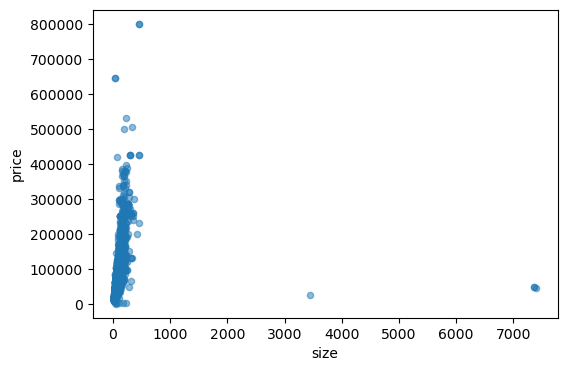

In [23]:
df9.plot(kind='scatter', x="size", y="price", alpha = 0.5, figsize=(6,4))
plt.show()

Now we change the value **"Dogovornaya"** in the df1 dataframe.

In [24]:
df7 = df1.replace("Договорная", np.NaN)

In [25]:
df8 = df7.astype({'size': 'float64'})
df91 = df8.sort_values(by=['size'])

In [26]:
df10 = df91.fillna(method='ffill')

In [27]:
df11 = df10.astype({'price': 'int64'})
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7565 entries, 1588 to 2547
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7565 non-null   object 
 1   district    7565 non-null   object 
 2   rooms       7565 non-null   int64  
 3   size        7565 non-null   float64
 4   level       7565 non-null   int64  
 5   max_levels  7565 non-null   int64  
 6   price       7565 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 472.8+ KB


Drop duplicates

In [28]:
df12 = df11.drop_duplicates()

In [29]:
df13 = df12.drop([1827, 2268, 2547, 3089, 4089, 4411, 4615, 5456, 7421,1831])
df13['size'][[981, 2662, 4784, 7043]] = df13['size'][[981, 2662, 4784, 7043]].map(lambda x: x / 100)
df14 = df13[(df13['price'] < 600_000)]
df15 = df14[df14['size'] < 300]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
df15

,location,district,rooms,size,level,max_levels,price
1588,"город Ташкент, Янгихаётский район, Yangi hayot...",Янгихаётский,5,1.00,6,9,45000
5496,"город Ташкент, Учтепинский район, Чиланзар 25-...",Учтепинский,2,1.00,2,5,35000
2363,"город Ташкент, Мирабадский район, Nurli zamin ...",Мирабадский,4,3.00,1,1,50000
4690,"город Ташкент, Мирабадский район, 1-й проезд Х...",Мирабадский,5,3.80,2,2,90000
4053,"город Ташкент, Мирзо-Улугбекский район, Элобод",Мирзо-Улугбекский,2,4.00,1,3,26000
...,...,...,...,...,...,...,...
4622,"город Ташкент, Яккасарайский район, Ракат",Яккасарайский,3,290.00,1,5,270000
2662,"город Ташкент, Учтепинский район, Учтепинский ...",Учтепинский,1,34.48,5,5,25000
981,"город Ташкент, Мирабадский район, Массив Куйлю...",Мирабадский,3,73.59,2,4,46500
4784,"город Ташкент, Мирабадский район, Массив Куйлюк1",Мирабадский,3,73.59,2,4,46500


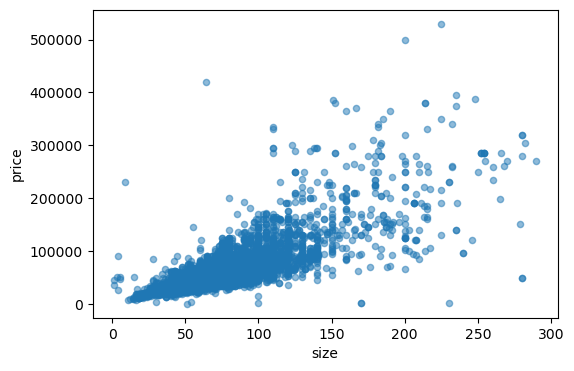

In [31]:
df15.plot(kind='scatter', x="size", y="price", alpha = 0.5, figsize=(6,4))
plt.show()

We continue the visualization

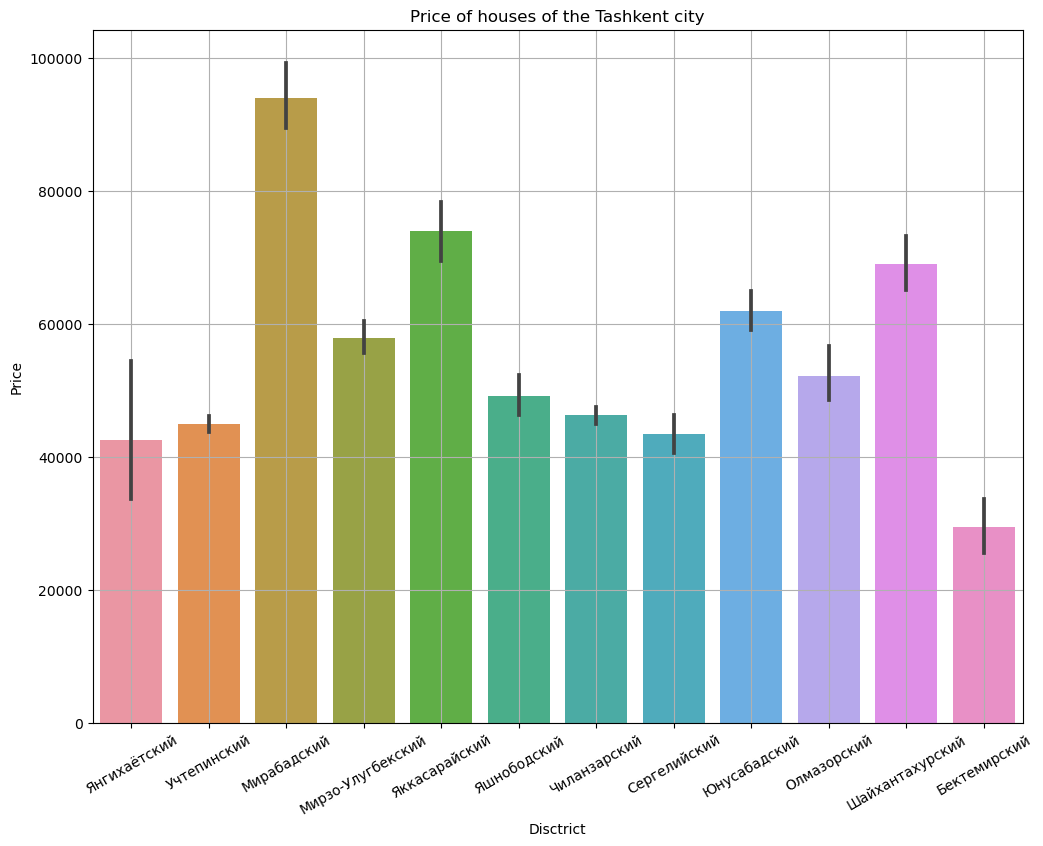

In [32]:
plt.figure(figsize=(12,9))
sns.barplot(x=df15.district, y=df15['price'])

plt.title("Price of houses of the Tashkent city")
plt.xlabel("Disctrict")
plt.ylabel("Price")
plt.grid() # Chizmaga gorizontal va vertikal chiziqlar (setka) qo'shish
plt.xticks(rotation=30)
plt.show()

We analyze the balance in the Size column.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


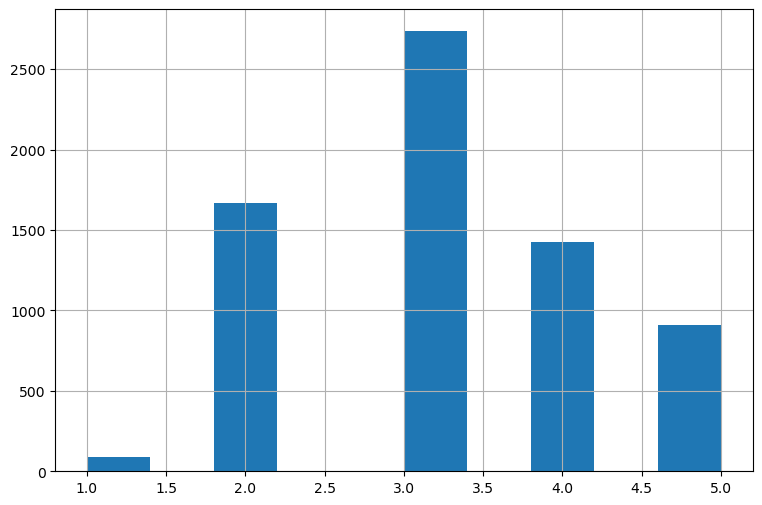

In [33]:
df15['size_cat'] = pd.cut(df15['size'], bins=[0., 25.0, 50.0, 75.0, 100.0, np.inf], labels=[1,2,3,4,5])
df15['size_cat'].hist(figsize=(9,6))
plt.show()

<h4>We divide the data into a **balanced** *train* and a *test* set.</h4>

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df15,df15['size_cat']):
    strat_train_set = df15.iloc[train_index]
    strat_test_set = df15.iloc[test_index]
    
strat_train_set.drop('size_cat', axis=1, inplace=True)
strat_test_set.drop('size_cat', axis=1, inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [35]:
strat_train_set.drop("location", axis=1, inplace=True)
strat_test_set.drop("location", axis=1, inplace=True)

In [36]:
strat_test_set

,district,rooms,size,level,max_levels,price
3867,Мирабадский,3,105.0,7,9,125000
264,Мирзо-Улугбекский,4,91.0,1,5,75000
2787,Мирабадский,4,100.0,7,9,105000
1253,Чиланзарский,4,100.0,9,9,48000
4707,Юнусабадский,2,55.0,1,9,41000
...,...,...,...,...,...,...
7481,Сергелийский,3,82.0,2,9,33000
1203,Чиланзарский,2,46.0,2,4,35000
2487,Чиланзарский,3,70.0,3,3,40000
7460,Сергелийский,3,78.0,5,5,42000


We choose *balanced sets* for work.

This time we separate the *price* column (which we need to optimize) as well. This is because the changes applied to the rest of the columns are not applied to the label.

In [37]:
housing = strat_train_set.drop("price", axis=1)
housing_labels = strat_train_set["price"].copy()

<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Changing the shape of text columns</h1>

The ocean_proximity column of our dataset is a text column. 

Let's break down this column to get started.

In [38]:
housing_cat = housing[['district']]
housing_num = housing.drop("district", axis=1)

Using the OneHotEncoder method, each unique value becomes a separate column and we put 1 in the corresponding column and 0 in the rest.

In [39]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [40]:
housing

,district,rooms,size,level,max_levels
928,Мирзо-Улугбекский,2,60.0,7,9
2664,Мирабадский,3,100.0,7,8
7080,Чиланзарский,2,48.0,2,4
4281,Мирзо-Улугбекский,3,105.0,5,6
6504,Мирзо-Улугбекский,2,46.0,4,4
...,...,...,...,...,...
3355,Мирзо-Улугбекский,2,70.0,3,6
3633,Чиланзарский,3,100.0,6,9
1593,Чиланзарский,4,120.0,5,5
3742,Чиланзарский,1,42.0,3,4


We can make a **ransformer**

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, size_ix, level_ix, max_levels_ix = 0, 1, 2, 3

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_size_of_per_room = True):
        self.add_size_of_per_room = add_size_of_per_room
    def fit(self, X, y=None):
        return self # bizni funksiyamiz faqat transformer. estimator emas
    def transform(self, X):
        percent_of_levels = X[:, level_ix] * 100 / X[:, max_levels_ix]
        if self.add_size_of_per_room: # add_bedrooms_per_room ustuni ixtiyoriy bo'ladi
            size_of_per_room = X[:, size_ix] / X[:, rooms_ix]
            return np.c_[X, percent_of_levels, size_of_per_room]
        else:
            return np.c_[X, percent_of_levels]

In [42]:
attr_adder = CombinedAttributesAdder(add_size_of_per_room=True)
housing_extra_attribs = attr_adder.transform(housing_num.values)
housing_extra_attribs[0,:]

array([ 2.        , 60.        ,  7.        ,  9.        , 77.77777778,
       30.        ])

In [43]:
attr_adder = CombinedAttributesAdder(add_size_of_per_room=False)
housing_extra_attribs = attr_adder.transform(housing_num.values)
housing_extra_attribs[0,:]

array([ 2.        , 60.        ,  7.        ,  9.        , 77.77777778])

<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Standard Scaler</h1>


In [44]:
from sklearn.preprocessing import StandardScaler
standart_scaler = StandardScaler()
standart_scaler.fit_transform(housing_num)

array([[-0.5800993 , -0.37121257,  1.46840629,  1.13235263],
       [ 0.36748293,  0.80955487,  1.46840629,  0.74869945],
       [-0.5800993 , -0.7254428 , -0.7557363 , -0.78591325],
       ...,
       [ 1.31506517,  1.39993858,  0.57874925, -0.40226007],
       [-1.52768153, -0.90255791, -0.31090778, -0.78591325],
       [-0.5800993 , -0.57784687, -0.31090778, -0.78591325]])

In [45]:
housing

,district,rooms,size,level,max_levels
928,Мирзо-Улугбекский,2,60.0,7,9
2664,Мирабадский,3,100.0,7,8
7080,Чиланзарский,2,48.0,2,4
4281,Мирзо-Улугбекский,3,105.0,5,6
6504,Мирзо-Улугбекский,2,46.0,4,4
...,...,...,...,...,...
3355,Мирзо-Улугбекский,2,70.0,3,6
3633,Чиланзарский,3,100.0,6,9
1593,Чиланзарский,4,120.0,5,5
3742,Чиланзарский,1,42.0,3,4


In [46]:
housing_onehot = pd.get_dummies(housing['district'])
housing_onehot

,Бектемирский,Мирабадский,Мирзо-Улугбекский,Олмазорский,Сергелийский,Учтепинский,Чиланзарский,Шайхантахурский,Юнусабадский,Яккасарайский,Янгихаётский,Яшнободский
928,0,0,1,0,0,0,0,0,0,0,0,0
2664,0,1,0,0,0,0,0,0,0,0,0,0
7080,0,0,0,0,0,0,1,0,0,0,0,0
4281,0,0,1,0,0,0,0,0,0,0,0,0
6504,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3355,0,0,1,0,0,0,0,0,0,0,0,0
3633,0,0,0,0,0,0,1,0,0,0,0,0
1593,0,0,0,0,0,0,1,0,0,0,0,0
3742,0,0,0,0,0,0,1,0,0,0,0,0


In [47]:
housing_num

,rooms,size,level,max_levels
928,2,60.0,7,9
2664,3,100.0,7,8
7080,2,48.0,2,4
4281,3,105.0,5,6
6504,2,46.0,4,4
...,...,...,...,...
3355,2,70.0,3,6
3633,3,100.0,6,9
1593,4,120.0,5,5
3742,1,42.0,3,4


<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Pipeline</h1>


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

num_pipeline = Pipeline([
          ('std_scaler', StandardScaler())             
])

In [49]:
num_pipeline.fit_transform(housing_num)

array([[-0.5800993 , -0.37121257,  1.46840629,  1.13235263],
       [ 0.36748293,  0.80955487,  1.46840629,  0.74869945],
       [-0.5800993 , -0.7254428 , -0.7557363 , -0.78591325],
       ...,
       [ 1.31506517,  1.39993858,  0.57874925, -0.40226007],
       [-1.52768153, -0.90255791, -0.31090778, -0.78591325],
       [-0.5800993 , -0.57784687, -0.31090778, -0.78591325]])

In [50]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['district']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [51]:
housing_prepared = full_pipeline.fit_transform(housing)

In [52]:
housing_prepared[0:5,:]

array([[-0.5800993 , -0.37121257,  1.46840629,  1.13235263,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.36748293,  0.80955487,  1.46840629,  0.74869945,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.5800993 , -0.7254428 , -0.7557363 , -0.78591325,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.36748293,  0.95715079,  0.57874925, -0.0186069 ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.5800993 , -0.78448117,  0

Now our data is ready.
<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Machine learning</h1>

<h1>Linear Regression </h1>

In [53]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()

In [54]:
LR_model.fit(housing_prepared, housing_labels)

LinearRegression()

Let's check how well the model works

In [55]:
test_data = housing.sample(10)
test_data

,district,rooms,size,level,max_levels
3283,Олмазорский,4,140.0,5,5
896,Чиланзарский,2,50.0,4,4
2402,Шайхантахурский,2,46.0,5,9
1802,Яккасарайский,1,50.0,4,12
3718,Юнусабадский,4,106.0,1,6
1368,Чиланзарский,5,160.0,6,9
2237,Мирзо-Улугбекский,2,55.0,4,4
5620,Олмазорский,2,60.0,3,4
7087,Мирзо-Улугбекский,2,48.0,4,4
5684,Мирзо-Улугбекский,3,83.0,2,8


In [56]:
test_label = housing_labels.loc[test_data.index]
test_label

3283    110000
896      31000
2402     24500
1802     52000
3718    105000
1368     90000
2237     32000
5620     39000
7087     27394
5684     77000
Name: price, dtype: int64

In [57]:
test_data_prepared = full_pipeline.transform(test_data)
test_data_prepared

array([[ 1.31506517,  1.9903223 ,  0.57874925, -0.40226007,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.5800993 , -0.66640443,  0.13392074, -0.78591325,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.5800993 , -0.78448117,  0.57874925,  1.13235263,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-1.52768153, -0.66640443,  0.13392074,  2.28331216,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ],
       [ 1.31506517,  0.98666998, -1

In [58]:
predicted_data = LR_model.predict(test_data_prepared)
predicted_data

array([112324.56674457,  32767.17990833,  30310.68394929,  53840.56939103,
        92386.89442358, 136419.38312792,  41913.12615162,  38032.30369354,
        33964.6430454 ,  72760.31622818])

In [59]:
pd.DataFrame({'Predict':predicted_data, 'Real price': test_label})

,Predict,Real price
3283,112324.566745,110000
896,32767.179908,31000
2402,30310.683949,24500
1802,53840.569391,52000
3718,92386.894424,105000
1368,136419.383128,90000
2237,41913.126152,32000
5620,38032.303694,39000
7087,33964.643045,27394
5684,72760.316228,77000


<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Let's evaluate the model.</h1>


In [60]:
test_set = strat_test_set
test_set

,district,rooms,size,level,max_levels,price
3867,Мирабадский,3,105.0,7,9,125000
264,Мирзо-Улугбекский,4,91.0,1,5,75000
2787,Мирабадский,4,100.0,7,9,105000
1253,Чиланзарский,4,100.0,9,9,48000
4707,Юнусабадский,2,55.0,1,9,41000
...,...,...,...,...,...,...
7481,Сергелийский,3,82.0,2,9,33000
1203,Чиланзарский,2,46.0,2,4,35000
2487,Чиланзарский,3,70.0,3,3,40000
7460,Сергелийский,3,78.0,5,5,42000


First let's extract the predictor columns (all columns except `price`):

In [61]:
X_test = test_set.drop('price', axis=1)
X_test

,district,rooms,size,level,max_levels
3867,Мирабадский,3,105.0,7,9
264,Мирзо-Улугбекский,4,91.0,1,5
2787,Мирабадский,4,100.0,7,9
1253,Чиланзарский,4,100.0,9,9
4707,Юнусабадский,2,55.0,1,9
...,...,...,...,...,...
7481,Сергелийский,3,82.0,2,9
1203,Чиланзарский,2,46.0,2,4
2487,Чиланзарский,3,70.0,3,3
7460,Сергелийский,3,78.0,5,5


In [62]:
y_test = test_set['price'].copy()
y_test

3867    125000
264      75000
2787    105000
1253     48000
4707     41000
         ...  
7481     33000
1203     35000
2487     40000
7460     42000
6627    135000
Name: price, Length: 1366, dtype: int64

We also pass **test_set** through the *pipeline:*

In [63]:
X_test_prepared = full_pipeline.transform(X_test)

Predict

In [64]:
y_predicted = LR_model.predict(X_test_prepared)

We use the Root mean square error (RMSE) we saw in the previous section to compare the forecast and real data:

In [65]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

24892.907691861477


<h1>DecisionTree</h1>

In [66]:
from sklearn.tree import DecisionTreeRegressor
Tree_model = DecisionTreeRegressor()
Tree_model.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [67]:
y_predicted = Tree_model.predict(X_test_prepared)

In [68]:
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

33317.594877448966


<h1>RandomForest</h1>

In [69]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor()
RF_model.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [70]:
y_predicted = RF_model.predict(X_test_prepared)
lin_mse = mean_squared_error(y_test, y_predicted)
# RMSE hisoblaymiz
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

23913.544679310005


<h1 style="color:white; padding: 20px; background-color: green; display:inline-block">Saving model</h1>

In [71]:
import pickle

filename = 'RF_model.pkl' # faylga istalgan nom beramiz
with open(filename, 'wb') as file:
    pickle.dump(RF_model, file)

In [72]:
import joblib

filename = 'RF_model.jbl' # faylga istalgan nom beramiz
joblib.dump(RF_model, filename)

['RF_model.jbl']

<h1 style="color:white; padding: 20px; background-color: blue;">That's it. Thank you for your attention</h1>